<a href="https://colab.research.google.com/github/prachi-77/hotel_review_sentiment_analysis/blob/main/Hotel_Review_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from transformers import pipeline
import matplotlib.pyplot as plt
specific_model = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/949 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/540M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/338 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/843k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/22.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


In [ ]:
hotel_reviews = [
    "The hotel staff was very friendly and helpful. The room was clean and comfortable and amazing food and location.",
    "The hotel location was convenient, but the room was small and the service was slow.",
    "I had a terrible experience at this hotel. The room was dirty and the staff was rude.",
    "Overall, I had a great stay at this hotel. The facilities were excellent and the food was delicious.",
    "The hotel room had a strange smell and the bed was uncomfortable. I would not recommend this place.",
    "The room was excellent but the food was poor.",
    "The locations is great, amazing food but the room was dirty and staff was rude.",
    "Excellent location, perfect food ",
    "The room was average, neither exceptionally clean nor dirty, and the service was neither outstanding nor particularly slow.",
    "The hotel was located in a quiet area, which was nice for sleeping. The room itself was a bit outdated, but everything was clean and functional. The breakfast was basic, but it was included in the price. Overall, it was an average hotel experience - nothing special, but nothing terrible either."
]

In [ ]:
def analyze_review(review,rating):
    # Initialize lists to store positive and negative aspects
    positive_aspects = []
    negative_aspects = []
    neutral_aspects = []
    # Convert review to lowercase for case-insensitive matching
    review = review.lower()

    # Define keywords for different aspects
    food_keywords = ["food", "breakfast", "dinner", "lunch"]
    cleanliness_keywords = ["clean", "dirty", "cleanliness"]
    staff_keywords = ["staff", "service", "employee"]
    room_keywords = ["room", "bed", "bathroom", "suite"]
    location_keywords = ["location", "area", "neighborhood"]
    amenities_keywords = ["facilities", "amenities", "pool", "gym"]

     # Check for mentions of different aspects in the review
    for aspect, keywords in zip(["Food", "Cleanliness", "Staff", "Room", "Location", "Amenities"],
                               [food_keywords, cleanliness_keywords, staff_keywords, room_keywords, location_keywords, amenities_keywords]):
        if any(keyword in review for keyword in keywords) and rating in range(4,6):
            positive_aspects.append(aspect)
        elif any(keyword in review for keyword in keywords) and rating in range(1,3):
            negative_aspects.append(aspect)

        else:
          neutral_aspects.append(aspect)


    return positive_aspects, negative_aspects, neutral_aspects

In [ ]:
def get_sentiment_score(review):
    # Perform sentiment analysis on the review
    result = specific_model(review)
    label = result[0]['label']
    score = result[0]['score']
    print("res",result)
    # Extract sentiment label and convert it to a numeric score
    if label == 'NEG' and  0.95<=round(score,2)<=1:
        return 1
    elif label == 'NEG' and 0.90<=round(score,2)<=0.95:
        return 2
    elif label == 'NEG' and round(score,2)<0.90:
        return 3
    elif label == 'NEUTRAL':
        return 3
    elif label == 'POS' and  0.95<=round(score,2)<=1:
        return 5
    elif label == 'POS' and 0.90<=round(score,2)<=0.95:
        return 4
    elif label == 'POS' and round(score,2)<0.90:
        return 3

In [ ]:
def visualize_ratings():
  rating_counts = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0}
  for rating in ratings:
      rating_counts[rating] += 1

  # Plotting the bar graph
  plt.bar(rating_counts.keys(), rating_counts.values(), color='skyblue')
  plt.xlabel('Rating')
  plt.ylabel('Count')
  plt.title('Overall Distribution of Hotel Ratings')
  plt.xticks(range(1, 6))
  plt.show()

import numpy as np
def visualize_aspects():
  # Plotting the horizontal bar chart
  aspects = list(aspect_sentiments.keys())
  positive_counts = [aspect_sentiments[aspect]["Positive"] for aspect in aspects]
  negative_counts = [aspect_sentiments[aspect]["Negative"] for aspect in aspects]
  neutral_counts = [aspect_sentiments[aspect]["Neutral"] for aspect in aspects]
  total_counts = np.add(positive_counts, np.add(negative_counts, neutral_counts))

  # Plotting the horizontal stacked bar chart
  plt.figure(figsize=(10, 6))

  index = range(len(aspects))

  bar_width = 0.35

  plt.bar(index, positive_counts, bar_width, label='Positive', color='lightgreen')
  plt.bar(index, negative_counts, bar_width, bottom=positive_counts, label='Negative', color='salmon')
  plt.bar(index, neutral_counts, bar_width, bottom=np.add(positive_counts, negative_counts), label='Neutral', color='skyblue')

  plt.xlabel('Aspect')
  plt.ylabel('Sentiment Counts')
  plt.title('Sentiment Analysis of Hotel Aspects')
  plt.xticks(index, aspects)
  plt.legend()
  plt.tight_layout()
  plt.show()

res [{'label': 'POS', 'score': 0.9923346638679504}]
The hotel staff was very friendly and helpful. The room was clean and comfortable and amazing food and location.
Review 1: Rating = 5
Positive Aspects: Food, Cleanliness, Staff, Room, Location

res [{'label': 'NEG', 'score': 0.9400975704193115}]
The hotel location was convenient, but the room was small and the service was slow.
Review 2: Rating = 2
Negative Aspects: Staff, Room, Location

res [{'label': 'NEG', 'score': 0.9833725094795227}]
I had a terrible experience at this hotel. The room was dirty and the staff was rude.
Review 3: Rating = 1
Negative Aspects: Cleanliness, Staff, Room

res [{'label': 'POS', 'score': 0.9927852153778076}]
Overall, I had a great stay at this hotel. The facilities were excellent and the food was delicious.
Review 4: Rating = 5
Positive Aspects: Food, Amenities

res [{'label': 'NEG', 'score': 0.9795354008674622}]
The hotel room had a strange smell and the bed was uncomfortable. I would not recommend this

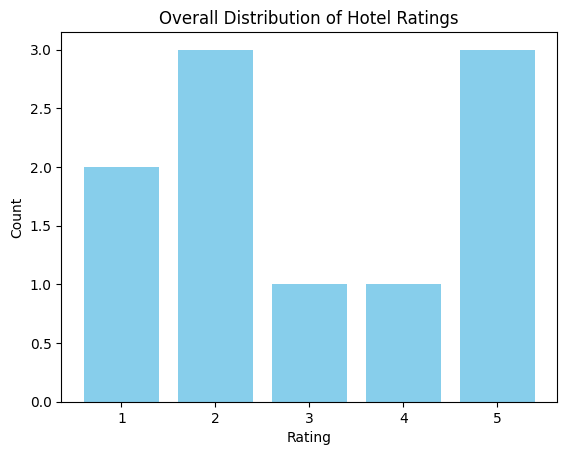

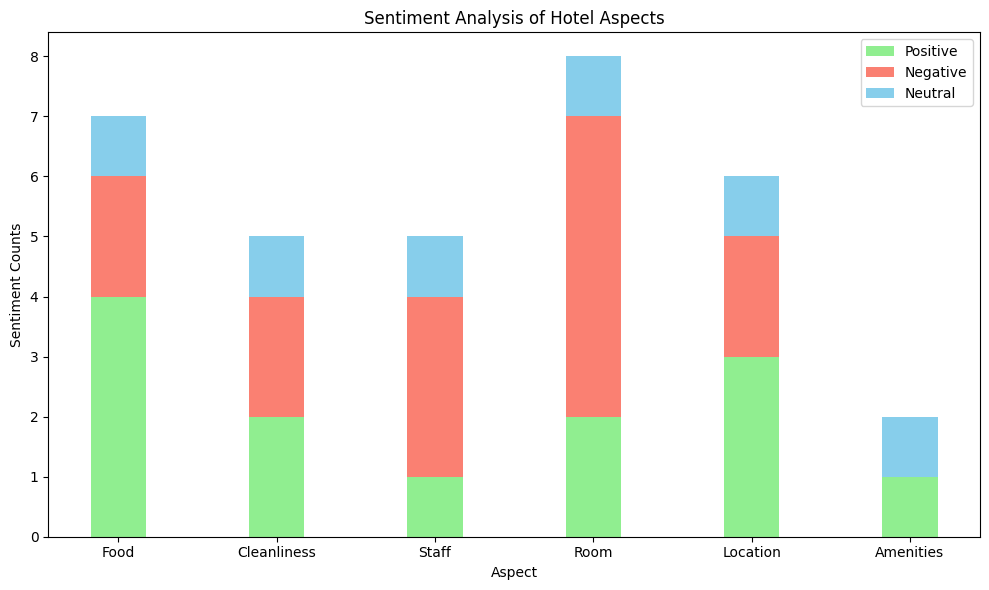

In [ ]:
ratings = []
# Initialize dictionaries to store counts of positive, negative, and neutral sentiments for each aspect
aspect_sentiments = {
    "Food": {"Positive": 0, "Negative": 0, "Neutral": 0},
    "Cleanliness": {"Positive": 0, "Negative": 0, "Neutral": 0},
    "Staff": {"Positive": 0, "Negative": 0, "Neutral": 0},
    "Room": {"Positive": 0, "Negative": 0, "Neutral": 0},
    "Location": {"Positive": 0, "Negative": 0, "Neutral": 0},
    "Amenities": {"Positive": 0, "Negative": 0, "Neutral": 0}
}

for idx, review in enumerate(hotel_reviews):
    rating = get_sentiment_score(review)
    positive_aspects, negative_aspects, neutral_aspects = analyze_review(review, rating)
    ratings.append(rating)
    print(review)
    print(f"Review {idx+1}: Rating = {rating}")

    if positive_aspects:
        print("Positive Aspects:", ", ".join(positive_aspects))
        for aspect in positive_aspects:
            aspect_sentiments[aspect]["Positive"] += 1
    elif negative_aspects:
        print("Negative Aspects:", ", ".join(negative_aspects))
        for aspect in negative_aspects:
            aspect_sentiments[aspect]["Negative"] += 1
    else:
        print("Neutral Aspects:", ", ".join(neutral_aspects))
        for aspect in neutral_aspects:
            aspect_sentiments[aspect]["Neutral"] += 1
    print()

visualize_ratings()
visualize_aspects()